In [16]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import pydot 
import matplotlib.pyplot as plt
import h5py
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.models import load_model 
from keras.utils.vis_utils import plot_model
import cv2
from sklearn.model_selection import train_test_split

In [17]:

# K.set_image_dim_ordering('tf')
# load data
numepochs=50
batchsize=128
folder_path = './data/'
images = []
labels = []
class_label = 0

original_images = []

def load_original_images(folder):
	for filename in os.listdir(folder):
		img = cv2.imread(os.path.join(folder, filename))
		if img is not None:
			original_images.append(img)
			
def load_images_from_folder(folder,class_label):
	for filename in os.listdir(folder):
		img = cv2.imread(os.path.join(folder, filename))
		if img is not None:
			img = cv2.resize(img,(255,255))
			img = img.reshape(255,255,3)
			images.append(img)
			labels.append(class_label)
	class_label=class_label+1
	return class_label

class_label = load_images_from_folder(folder_path+'benign',class_label)
class_label = load_images_from_folder(folder_path+'malignant',class_label)
load_original_images(folder_path+'benign')
load_original_images(folder_path+'malignant')

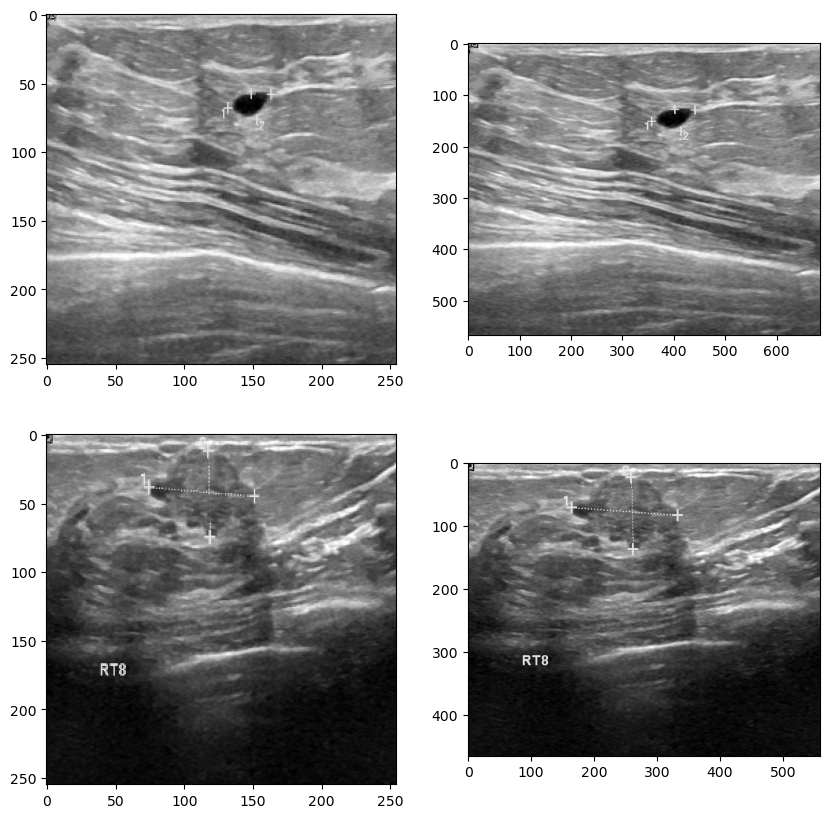

In [18]:
# Display the image
fig = plt.figure(figsize=(10,10))
fig.add_subplot(2,2,1)
plt.imshow(images[0])
fig.add_subplot(2,2,2)
plt.imshow(original_images[0])
fig.add_subplot(2,2,3)
plt.imshow(images[1])
fig.add_subplot(2,2,4)
plt.imshow(original_images[1])

In [19]:

Data = np.asarray(images)
Labels = np.asarray(labels)

X_train,X_test,y_train,y_test=train_test_split(Data,Labels,test_size=0.2,random_state=2)

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

#printing sizes
print ("train data shape:")
print (X_train.shape)
print ("test data shape:")
print (X_test.shape)
print ("train label shape:")
print (y_train.shape)
print ("test label shape:")
print (y_test.shape)
#print (y_test)


train data shape:
(517, 255, 255, 3)
test data shape:
(130, 255, 255, 3)
train label shape:
(517, 2)
test label shape:
(130, 2)


In [21]:

# define the larger model
def larger_model():
	# create model
	model = Sequential()
	model.add(Conv2D(32, (3, 3), padding="same",input_shape=(255, 255,3), activation='relu'))
	#model.add(Conv2D(32, (3, 3), activation='relu',padding = 'same'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(32, (3, 3), activation='relu',padding = 'same'))
	#model.add(Conv2D(64, (3, 3), activation='relu',padding = 'same'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu',padding = 'same'))
	#model.add(Conv2D(128, (3, 3), activation='relu',padding = 'same'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.5))
	model.add(Flatten())
	model.add(Dropout(0.5))
	model.add(Dense(64, activation='relu'))
	model.add(Dropout(0.5))
	model.add(Dense(64, activation='relu'))
	model.add(Dropout(0.5))
	#model.add(Dense(50, activation='relu'))
	#model.add(Dropout(0.2))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
	
# build the model
model = larger_model()

In [22]:


# Fit the model
hist=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=numepochs, batch_size=batchsize)
model.summary()
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=1,batch_size=batchsize)
model.save('first_try.h5')
print("Deep Net Accuracy: %.2f%%" % (scores[1]*100))

#reloading a model
#model = load_model('reloadmodel.h5')
#model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#hist=model.fit(x_train, y_train, validation_data=(x_test, y_test),epochs=10, batch_size=1)


Epoch 1/50
5/5 [==============================] - 10s 2s/step - loss: 0.7539 - accuracy: 0.6190 - val_loss: 0.6543 - val_accuracy: 0.7000
Epoch 2/50
5/5 [==============================] - 9s 2s/step - loss: 0.6569 - accuracy: 0.6306 - val_loss: 0.6448 - val_accuracy: 0.7000
Epoch 3/50
5/5 [==============================] - 9s 2s/step - loss: 0.6472 - accuracy: 0.6576 - val_loss: 0.6132 - val_accuracy: 0.7000
Epoch 4/50
5/5 [==============================] - 9s 2s/step - loss: 0.6332 - accuracy: 0.6518 - val_loss: 0.6162 - val_accuracy: 0.7000
Epoch 5/50
5/5 [==============================] - 9s 2s/step - loss: 0.6307 - accuracy: 0.6654 - val_loss: 0.6208 - val_accuracy: 0.7000
Epoch 6/50
5/5 [==============================] - 9s 2s/step - loss: 0.6286 - accuracy: 0.6692 - val_loss: 0.6018 - val_accuracy: 0.7000
Epoch 7/50
5/5 [==============================] - 9s 2s/step - loss: 0.6045 - accuracy: 0.6692 - val_loss: 0.5822 - val_accuracy: 0.7000
Epoch 8/50
5/5 [========================

In [23]:

#testing an image from the test set
print("\n\n***** TESTING AN IMAGE FROM TEST SET *****\n")
test_image = X_test[0:1]
print("Shape of test image 1:")
print (test_image.shape)
print("Predicted accuracies:")
print(model.predict(test_image))
print("Predicted class:")
print(model.predict_classes(test_image))
print("Actual class:")
print(y_test[0:1])




***** TESTING AN IMAGE FROM TEST SET *****

Shape of test image 1:
(1, 255, 255, 3)
Predicted accuracies:
1/1 [==============================] - 0s 138ms/step
[[9.9999905e-01 8.9862630e-07]]
Predicted class:


AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [24]:

#testing any image
print("\n\n***** TESTING ANY RANDOM IMAGE *****\n")
test_image = cv2.imread('m1.jpg')
test_image= cv2.resize(test_image,(140,92))
test_image = test_image.reshape(92,140,3)
test_image = np.array(test_image)
test_image = test_image.astype('float32')
test_image /= 255
test_image= np.expand_dims(test_image, axis=0)
print("Shape of test image 2:")
print (test_image.shape)
print("Predicted accuracies:")
print((model.predict(test_image)))
print("Predicted class:")
print(model.predict_classes(test_image))




***** TESTING ANY RANDOM IMAGE *****



[ WARN:0@817.386] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('m1.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.6.0) /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'


In [25]:


# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(numepochs)

plt.figure(1,figsize=(14,7))
#plt.figure(1)
plt.subplot(121)
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

#plt.figure(2,figsize=(7,5))
plt.subplot(122)
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)

plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.show()

KeyError: 'acc'